# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_crypto = {
    "crypto": ["1.2", "5.3"]
}

my_btc = 1.2
my_eth = 5.3

my_crypto_ticker = ['my_btc', 'my_eth']

df_crypto = pd.DataFrame(my_crypto, index=my_crypto_ticker)
df_crypto.head()

,crypto
my_btc,1.2
my_eth,5.3


In [4]:
print(my_crypto['crypto'])

['1.2', '5.3']


In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
timeframe = '1D'

In [7]:
# Fetch current BTC price
btc_url = btc_url + "?format=json"
response_data_btc = requests.get(btc_url)
response_content_btc = response_data_btc.content
print(response_content_btc)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18901250,\n\t\t\t"total_supply": 18901250,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 48271.0000000000000000,\n\t\t\t\t\t"volume_24h": 29545053968,\n\t\t\t\t\t"market_cap": 911167675249,\n\t\t\t\t\t"percentage_change_1h": 0.6682930226217380,\n\t\t\t\t\t"percentage_change_24h": 2.9080163204484100,\n\t\t\t\t\t"percentage_change_7d": -4.6924431748822800,\n\t\t\t\t\t"percent_change_1h": 0.6682930226217380,\n\t\t\t\t\t"percent_change_24h": 2.9080163204484100,\n\t\t\t\t\t"percent_change_7d": -4.6924431748822800\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1639539731\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1639539731,\n\t\t"num_cryptocurrencies": 3105,\n\t\t"error": null\n\t}\n}'


In [8]:
data_btc = response_data_btc.json()
print(json.dumps(data_btc,indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18901250,
            "total_supply": 18901250,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 48271.0,
                    "volume_24h": 29545053968,
                    "market_cap": 911167675249,
                    "percentage_change_1h": 0.668293022621738,
                    "percentage_change_24h": 2.90801632044841,
                    "percentage_change_7d": -4.69244317488228,
                    "percent_change_1h": 0.668293022621738,
                    "percent_change_24h": 2.90801632044841,
                    "percent_change_7d": -4.69244317488228
                }
            },
            "last_updated": 1639539731
        }
    },
    "metadata": {
        "timestamp": 1639539731,
        "num_crypt

In [9]:
# Fetch current ETH price
eth_url = eth_url + "?format=json"
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
print(json.dumps(data_eth,indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 118743872,
            "total_supply": 118743872,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3848.61,
                    "volume_24h": 20268980952,
                    "market_cap": 456432966534,
                    "percentage_change_1h": 0.713817024255579,
                    "percentage_change_24h": 1.90373071157992,
                    "percentage_change_7d": -10.7168303001492,
                    "percent_change_1h": 0.713817024255579,
                    "percent_change_24h": 1.90373071157992,
                    "percent_change_7d": -10.7168303001492
                }
            },
            "last_updated": 1639539710
        }
    },
    "metadata": {
        "timestamp": 1639539710,
        "num_cr

In [10]:
print(len(data_eth))

2


In [11]:
# Compute current value of my crpto
my_eth_value = int(data_eth['data']['1027']['quotes']['USD']['price'])
my_btc_value = int(data_btc['data']['1']['quotes']['USD']['price'])

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48271.00
The current value of your 5.3 ETH is $3848.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stocks = alpaca.get_barset(
    tickers,
    timeframe,
    limit = 1000
).df

# Preview DataFrame
df_closing_price = pd.DataFrame()
df_closing_price['AGG'] = df_stocks['AGG']['close']
df_closing_price['SPY'] = df_stocks['SPY']['close']
df_closing_price.tail().dropna()

,AGG,SPY
time,,
2021-12-08 00:00:00-05:00,114.17,469.54
2021-12-09 00:00:00-05:00,114.20,466.34
2021-12-10 00:00:00-05:00,114.24,470.72
2021-12-13 00:00:00-05:00,114.60,466.61
2021-12-14 00:00:00-05:00,114.41,463.39


In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(df_stocks['AGG']['close'][-1])
spy_close_price = float(df_stocks['SPY']['close'][-1])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.41
Current SPY closing price: $463.39


In [16]:
# Compute the current value of shares
my_agg_value = (my_agg) * (agg_close_price)
my_spy_value = (my_spy) * (spy_close_price)
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23169.50
The current value of your 200 AGG shares is $22882.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_eth_value + my_btc_value
stocks = my_agg_value + my_spy_value
my_portfolio = ['crypto', 'stocks']

portfolio_value = {
    "amount": [crypto, stocks]
}

# Create savings DataFrame
df_portfolio = pd.DataFrame(portfolio_value, index=my_portfolio)

# Display savings DataFrame
df_portfolio

,amount
crypto,52119.0
stocks,46051.5


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

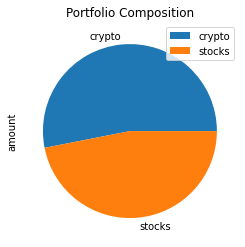

In [18]:
# Plot savings pie chart
df_portfolio.plot.pie(y='amount', title='Portfolio Composition')

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
df_savings = (crypto + stocks)

# Validate saving health
if df_savings > emergency_fund:
    greater = round(df_savings - emergency_fund, 2)
    print(f"Congratulations, your savings has enough money and exceeds your emergency fund by ${greater}")
elif df_savings < emergency_fund:
    less = round(emergency_fund - df_savings, 2)
    print(f"Please note your savings is below your desired savings goal by ${less}")
else:
    print(f"Congratulations, your savings is equal to the amount of your emergency fund")
    

Congratulations, your savings has enough money and exceeds your emergency fund by $62170.5


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   
2017-12-29 00:00:00-05:00  109.28  109.3900  109.2400  109.340  2073522   
2018-01-02 00:00:00-05:00  109.26  109.3100  108.9700  109.170  5495219   

                              SPY                                     
                             open    high      low   close    volume  
time                                                                  
2017-12-26 00:00:00-05:00  267.06  267.39  266.885  267.17  24888478  
2017-12-27 00:00:00-05:00  267.36  267.73  267.010  267.33  32573906  
2017-12-28 00:00:00-05:00  267.85  267.92  267.450  267.86  23583584  
2017-12-29 00:00:00-05:00  268.55  268.55  266.640  266.88  43875796  
2018-01-02 00:00:00-05:00  267.84  268.81  267.400  268.80  50844678

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns



In [23]:
# Printing the simulation input data
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4],
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_fiveyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   
2017-12-29 00:00:00-05:00  109.28  109.3900  109.2400  109.340  2073522   
2018-01-02 00:00:00-05:00  109.26  109.3100  108.9700  109.170  5495219   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-12-26 00:00:00-05:00          NaN  267.06  267.39  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.73  267.010  267.33   
2017-12-28 00:00:00-05:00    -0.000595  267.85  267.92  267.450  267.86   
2017-12-29 00:00:00-05:00     0.001099  268.55  268.55  266.640  266.88   
2018-01-02 00:00:00-05:00    -0.001555  267.84  268.81  267.400  268.80   

                                                  
                             volume daily_return  
time                                              
2017-12-26 00:00:00-05:00  24888478          NaN  
2017-12-27 00:00:00-05:00  32573906     0.000599  
2017-12-28 00:00:00-05:00  23583584     0.001983  
2017-12-29 00:00:00-05:00  43875796    -0.003659  
2018-01-02 00:00:00-05:00  50844678     0.007194

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Lincoln\LincPersonal\Homework\Week5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008060,0.999237,0.997501,1.007988,0.999473,1.002197,1.002381,1.004166,1.001483,1.007653,...,0.997350,0.997078,0.997243,0.996811,1.001890,1.000656,0.996789,0.997267,1.006511,1.009629
2,1.002465,1.001321,0.989891,0.996325,1.000933,1.002479,0.997129,1.003367,1.005365,1.009700,...,0.994987,0.995172,1.002980,0.998043,1.005849,0.999792,0.993213,0.998038,1.005946,1.010111
3,1.006958,0.995393,0.988934,0.984104,0.999859,0.998075,1.005665,1.012997,1.007988,1.009108,...,0.991925,1.001393,1.004680,0.995472,0.997225,0.998234,0.996044,1.008349,0.999922,1.002193
4,1.004250,0.990824,0.986039,0.991207,0.988623,1.001955,1.010631,1.022364,1.009730,1.020793,...,0.992991,1.000162,1.008197,1.000605,1.004559,0.993440,0.989763,1.002689,0.995634,1.002558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.871900,11.022838,6.443534,4.558680,6.408131,12.264812,7.179476,6.934402,5.651323,14.921743,...,9.624612,6.995417,6.483595,8.122197,6.937241,16.121821,6.784563,5.367823,5.772728,5.056714
7557,13.830144,10.925530,6.384612,4.590916,6.419126,12.372849,7.184997,6.920632,5.707081,14.853545,...,9.574167,7.003070,6.435531,8.094416,7.011974,16.121660,6.780730,5.359264,5.763474,5.103963
7558,13.717448,11.074666,6.391504,4.595577,6.437965,12.447354,7.226280,7.018803,5.709599,14.803209,...,9.558671,7.031924,6.491010,8.055953,6.942540,16.053000,6.789729,5.359262,5.785621,5.084962
7559,13.705712,11.137804,6.412330,4.604339,6.430182,12.575643,7.186605,6.989325,5.700800,14.892011,...,9.596443,7.011894,6.465919,8.022355,6.973295,16.119872,6.815404,5.387038,5.812720,5.073062


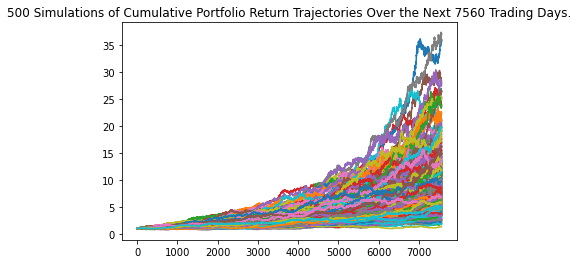

In [25]:
# Plot simulation outcomes
line_plot_6040 = MC_fiveyear.plot_simulation()

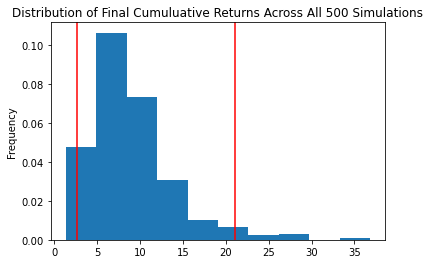

In [26]:
# Plot probability distribution and confidence intervals
dist_plot_6040 = MC_fiveyear.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stat_6040 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(summ_stat_6040)

count           500.000000
mean              8.991340
std               4.887358
min               1.336464
25%               5.672093
50%               7.925204
75%              11.105268
max              36.831366
95% CI Lower      2.674752
95% CI Upper     21.090033
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper_6040 = round(summ_stat_6040[8]*20000,2)
ci_lower_6040 = round(summ_stat_6040[9]*20000,2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_6040} and ${ci_upper_6040}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $421800.67 and $53495.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
alt_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_upper_6040_alt = round(summ_stat_6040[8]*30000,2)
ci_lower_6040_alt = round(summ_stat_6040[9]*30000,2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${alt_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_upper_6040_alt} and ${ci_lower_6040_alt}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $80242.55 and $632701.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear_9010 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.9,0.1],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   
2017-12-29 00:00:00-05:00  109.28  109.3900  109.2400  109.340  2073522   
2018-01-02 00:00:00-05:00  109.26  109.3100  108.9700  109.170  5495219   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-12-26 00:00:00-05:00          NaN  267.06  267.39  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.73  267.010  267.33   
2017-12-28 00:00:00-05:00    -0.000595  267.85  267.92  267.450  267.86   
2017-12-29 00:00:00-05:00     0.001099  268.55  268.55  266.640  266.88   
2018-01-02 00:00:00-05:00    -0.001555  267.84  268.81  267.400  268.80   

                                                  
                             volume daily_return  
time                                              
2017-12-26 00:00:00-05:00  24888478          NaN  
2017-12-27 00:00:00-05:00  32573906     0.000599  
2017-12-28 00:00:00-05:00  23583584     0.001983  
2017-12-29 00:00:00-05:00  43875796    -0.003659  
2018-01-02 00:00:00-05:00  50844678     0.007194

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear_9010.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\Lincoln\LincPersonal\Homework\Week5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001681,1.006637,1.001090,0.998400,1.003769,0.993908,1.004886,1.000221,0.999244,0.998285,...,1.006124,0.998703,0.996327,1.000431,0.997554,0.999795,0.993518,0.999194,0.998063,1.000404
2,1.005269,1.011776,1.007434,0.999385,1.002182,0.997096,0.998245,1.003225,1.000892,0.995397,...,1.010228,0.990884,0.995568,0.999474,1.000071,1.005387,0.994450,0.997483,0.999647,0.998019
3,1.004660,1.006014,1.011222,1.002860,1.000938,0.998452,0.995458,1.000909,1.008195,0.997029,...,1.012412,0.989986,0.998829,0.998236,0.999487,1.005154,0.995798,0.995926,1.000081,1.002291
4,1.005333,1.005028,1.014619,0.999111,1.005657,0.997533,0.997399,1.001436,1.005294,0.996242,...,1.010179,0.993770,1.001539,0.994665,0.998741,1.005364,0.992822,0.994931,0.996516,0.996673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.150462,1.107869,1.148602,1.138145,1.196805,1.065661,1.152973,1.211172,0.944702,1.097622,...,1.142743,1.255923,1.002515,1.314263,1.081170,1.037916,1.345666,0.970885,1.065484,1.226699
1257,1.151195,1.107016,1.150519,1.143151,1.192835,1.071115,1.155833,1.209221,0.948543,1.096513,...,1.147386,1.251652,1.002036,1.321432,1.084041,1.038095,1.345627,0.967779,1.065675,1.225355
1258,1.150409,1.103966,1.154918,1.148296,1.189558,1.070633,1.156441,1.203453,0.954353,1.089368,...,1.145053,1.253804,0.999709,1.325351,1.086029,1.036854,1.346558,0.970846,1.068582,1.223664
1259,1.151720,1.101643,1.151808,1.153739,1.187949,1.072111,1.160842,1.203068,0.950091,1.091285,...,1.142028,1.257393,1.006906,1.334541,1.080148,1.037067,1.345173,0.976940,1.069233,1.231975


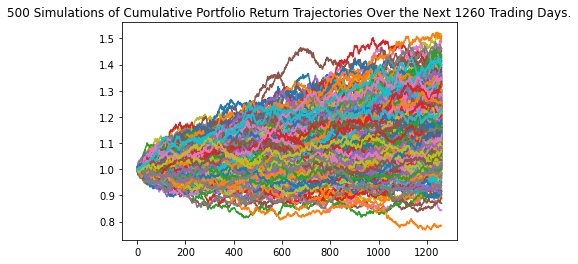

In [33]:
# Plot simulation outcomes
line_plot_9010 = MC_fiveyear_9010.plot_simulation()

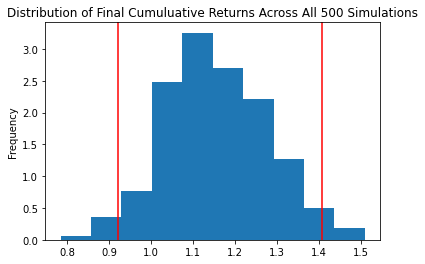

In [34]:
# Plot probability distribution and confidence intervals
dist_plot_9010 = MC_fiveyear_9010.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stat_9010 = MC_fiveyear_9010.summarize_cumulative_return()

# Print summary statistics
print(summ_stat_9010)

count           500.000000
mean              1.155338
std               0.122036
min               0.784273
25%               1.069233
50%               1.146514
75%               1.235684
max               1.508994
95% CI Lower      0.920571
95% CI Upper      1.407153
Name: 1260, dtype: float64


In [36]:
# Set initial investment
# Already set to $20,000.00

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_9010 = round(summ_stat_9010[8]*20000,2)
ci_upper_9010 = round(summ_stat_9010[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_9010} and ${ci_upper_9010}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18411.42 and $28143.07


The MC Simulation for a 90% stock & 10% bond portfolio actually reduces significantly based on the 60/40 model. This could be due to the major downturn in March 2020

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")